# ✅CODEALPHA TASK-1: CREDIT SCORING MODEL


STEP 1: DATA GENERATION & VISUALIZATION


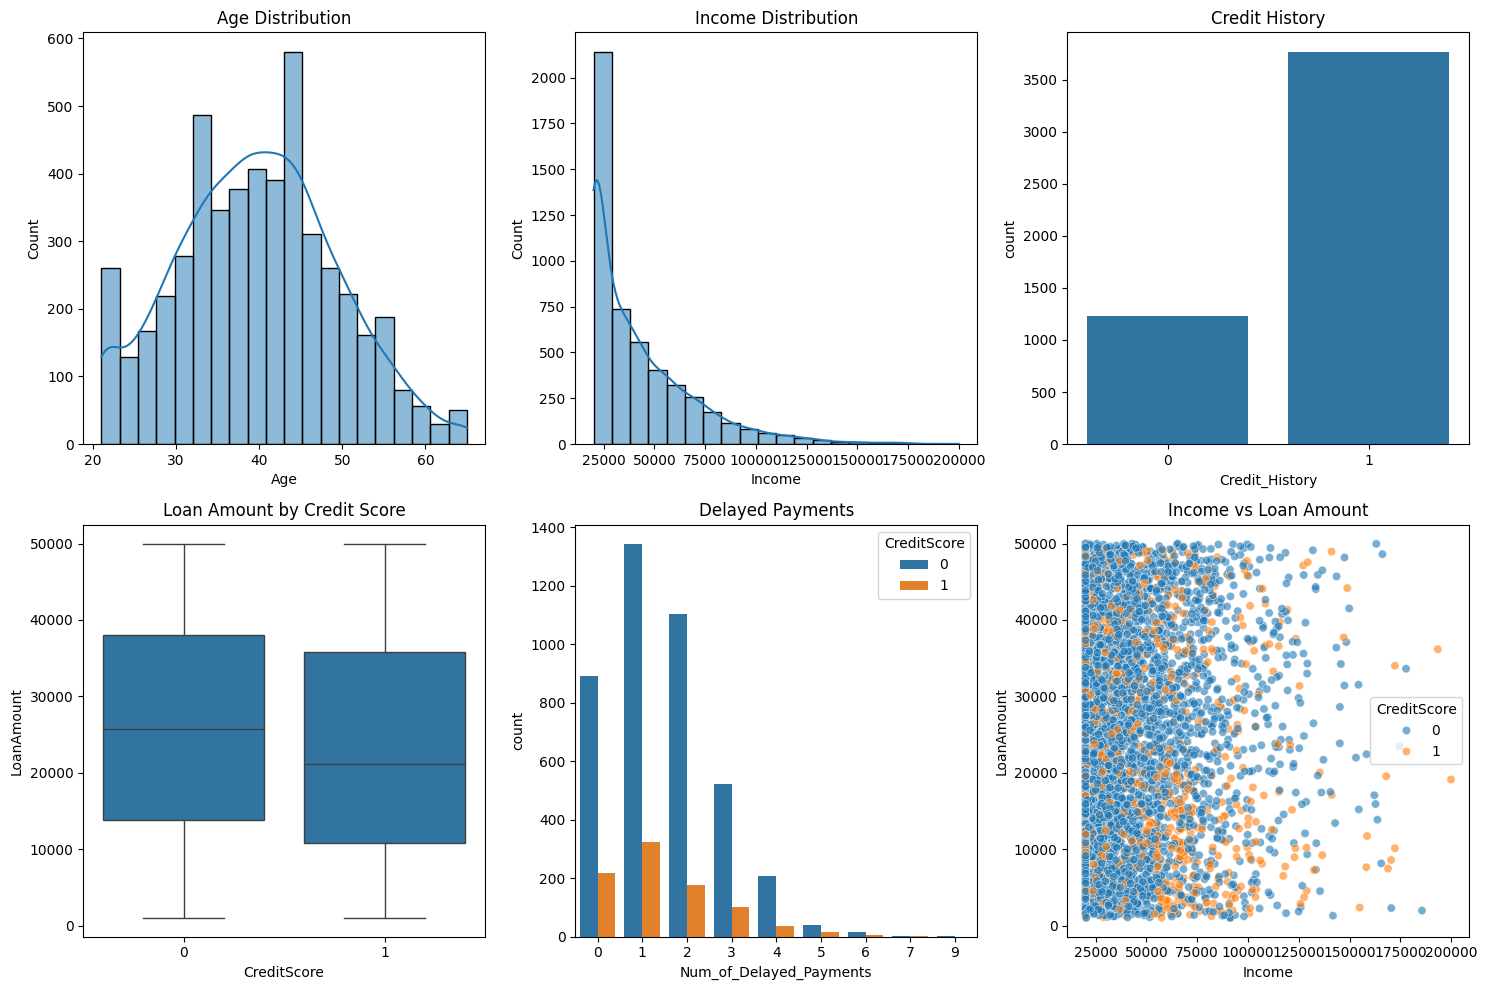


STEP 2: FEATURE ENGINEERING


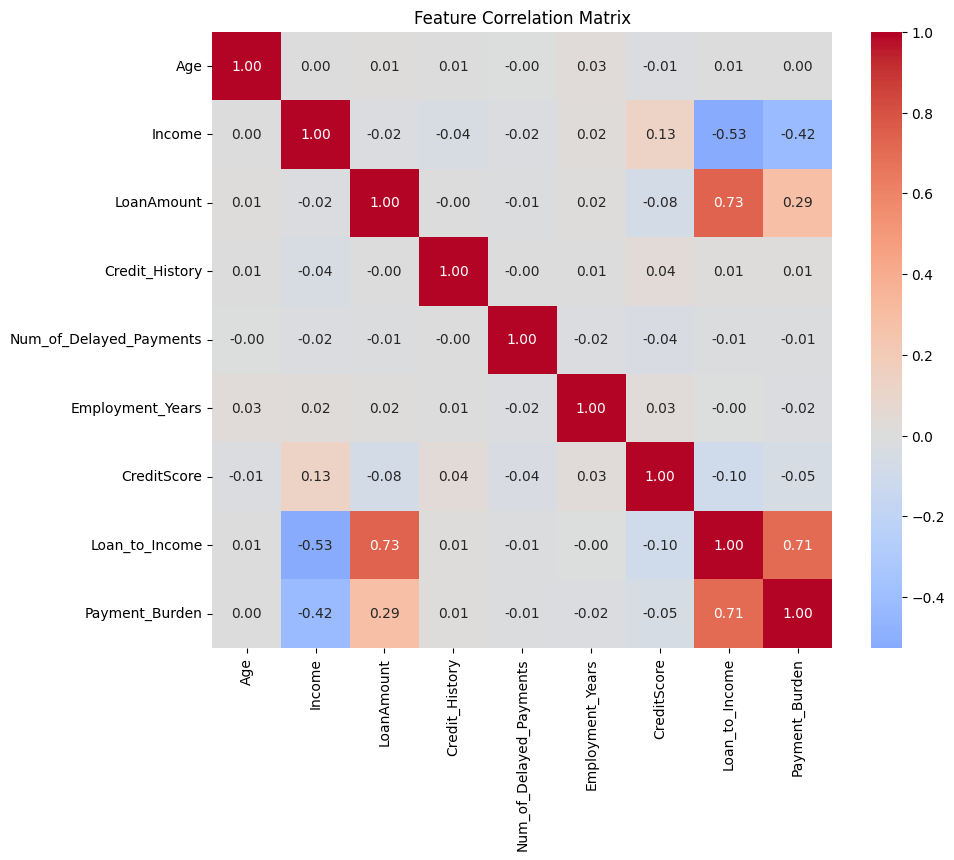


STEP 3: DATA PREPARATION

🔹 Data Preparation Complete:
Training samples: 3750
Test samples: 1250

STEP 4: MODEL TRAINING

✅ Model Training Complete!
OOB Score: 0.8056

STEP 5: MODEL EVALUATION

📊 PERFORMANCE METRICS (%):
  Accuracy: 80.64%
 Precision: 40.00%
    Recall: 21.00%
  F1 Score: 27.54%
   ROC AUC: 59.86%


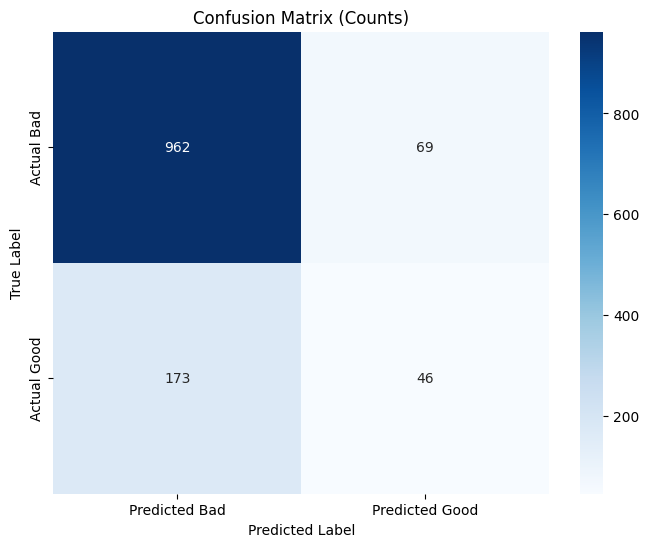


🔹 Classification Report:
              precision    recall  f1-score   support

  Bad Credit       0.85      0.93      0.89      1031
 Good Credit       0.40      0.21      0.28       219

    accuracy                           0.81      1250
   macro avg       0.62      0.57      0.58      1250
weighted avg       0.77      0.81      0.78      1250



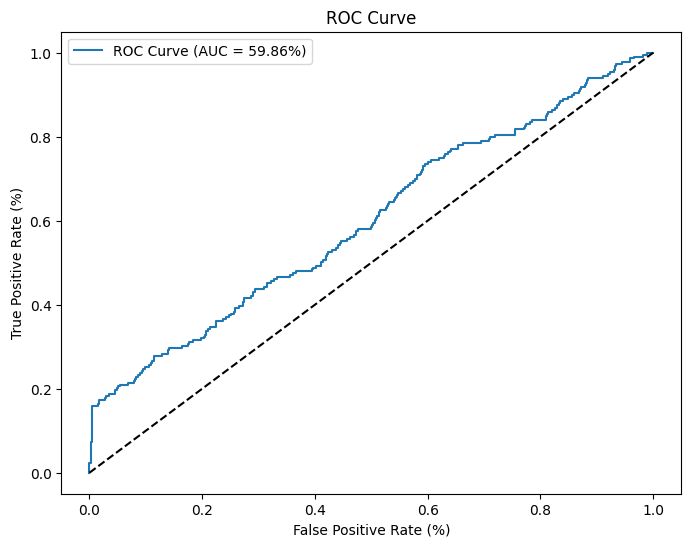


STEP 6: PREDICTION DEMONSTRATION

🔹 Good Credit Example:


,Age,Income,LoanAmount,Credit_History,Num_of_Delayed_Payments,Employment_Years,Loan_to_Income,Payment_Burden
0,35,85000,15000,1,0,8,0.176471,0.230769


Prediction: GOOD CREDIT ✅
Confidence: 86.39%

🔹 Bad Credit Example:


,Age,Income,LoanAmount,Credit_History,Num_of_Delayed_Payments,Employment_Years,Loan_to_Income,Payment_Burden
0,45,35000,30000,0,3,2,0.857143,2.0


Prediction: BAD CREDIT ❌
Confidence: 37.89%

✅ MODEL PIPELINE COMPLETE - READY FOR DEPLOYMENT


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.utils.class_weight import compute_class_weight

# ===================================
# STEP 1: DATA GENERATION & VISUALIZATION
# ===================================
print("\n" + "="*60)
print("STEP 1: DATA GENERATION & VISUALIZATION")
print("="*60)

np.random.seed(42)
n_samples = 5000

# Generate synthetic data
data = {
    'Age': np.clip(np.random.normal(40, 10, n_samples), 21, 65).astype(int),
    'Income': np.clip(np.random.gamma(2, 20000, n_samples), 20000, 200000).astype(int),
    'LoanAmount': np.random.randint(1000, 50000, n_samples),
    'Credit_History': np.random.choice([0, 1], size=n_samples, p=[0.25, 0.75]),
    'Num_of_Delayed_Payments': np.random.poisson(1.5, n_samples),
    'Employment_Years': np.random.randint(0, 40, n_samples),
}

df = pd.DataFrame(data)

# Create target variable
df['CreditScore'] = (
    (df['Income'] > 55000) & 
    (df['LoanAmount'] < 20000) & 
    (df['Credit_History'] == 1) & 
    (df['Num_of_Delayed_Payments'] < 2) & 
    (df['Employment_Years'] > 3)
).astype(int)

# Add realistic noise
noise_mask = np.random.random(n_samples) < 0.15
df.loc[noise_mask, 'CreditScore'] = 1 - df.loc[noise_mask, 'CreditScore']

# Data Visualization
plt.figure(figsize=(15, 10))

# Distribution Plots
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History')

plt.subplot(2, 3, 4)
sns.boxplot(x='CreditScore', y='LoanAmount', data=df)
plt.title('Loan Amount by Credit Score')

plt.subplot(2, 3, 5)
sns.countplot(x='Num_of_Delayed_Payments', hue='CreditScore', data=df)
plt.title('Delayed Payments')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Income', y='LoanAmount', hue='CreditScore', data=df, alpha=0.6)
plt.title('Income vs Loan Amount')

plt.tight_layout()
plt.show()

# ===================================
# STEP 2: FEATURE ENGINEERING
# ===================================
print("\n" + "="*60)
print("STEP 2: FEATURE ENGINEERING")
print("="*60)

# Create meaningful features
df['Loan_to_Income'] = df['LoanAmount'] / df['Income']
df['Payment_Burden'] = df['LoanAmount'] / np.maximum(df['Income'] - 20000, 1)

# Feature Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# ===================================
# STEP 3: DATA PREPARATION
# ===================================
print("\n" + "="*60)
print("STEP 3: DATA PREPARATION")
print("="*60)

# Select features and target
X = df[['Age', 'Income', 'LoanAmount', 'Credit_History', 
        'Num_of_Delayed_Payments', 'Employment_Years',
        'Loan_to_Income', 'Payment_Burden']]
y = df['CreditScore']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n🔹 Data Preparation Complete:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# ===================================
# STEP 4: MODEL TRAINING
# ===================================
print("\n" + "="*60)
print("STEP 4: MODEL TRAINING")
print("="*60)

# Calculate class weights
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Initialize and train model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight=class_weights,
    random_state=42,
    oob_score=True,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)

print("\n✅ Model Training Complete!")
print(f"OOB Score: {model.oob_score_:.4f}")

# ===================================
# STEP 5: MODEL EVALUATION
# ===================================
print("\n" + "="*60)
print("STEP 5: MODEL EVALUATION")
print("="*60)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred) * 100,
    'Precision': precision_score(y_test, y_pred) * 100,
    'Recall': recall_score(y_test, y_pred) * 100,
    'F1 Score': f1_score(y_test, y_pred) * 100,
    'ROC AUC': roc_auc_score(y_test, y_proba) * 100
}

print("\n📊 PERFORMANCE METRICS (%):")
for name, value in metrics.items():
    print(f"{name:>10}: {value:.2f}%")

# Confusion Matrix (Counts)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad Credit', 'Good Credit']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["ROC AUC"]:.2f}%)')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (%)')
plt.ylabel('True Positive Rate (%)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ===================================
# STEP 6: PREDICTION DEMONSTRATION
# ===================================
print("\n" + "="*60)
print("STEP 6: PREDICTION DEMONSTRATION")
print("="*60)

# Example customer with good credit
good_customer = pd.DataFrame({
    'Age': [35],
    'Income': [85000],
    'LoanAmount': [15000],
    'Credit_History': [1],
    'Num_of_Delayed_Payments': [0],
    'Employment_Years': [8],
    'Loan_to_Income': [15000/85000],
    'Payment_Burden': [15000/(85000-20000)]
}, index=[0])

# Example customer with bad credit
bad_customer = pd.DataFrame({
    'Age': [45],
    'Income': [35000],
    'LoanAmount': [30000],
    'Credit_History': [0],
    'Num_of_Delayed_Payments': [3],
    'Employment_Years': [2],
    'Loan_to_Income': [30000/35000],
    'Payment_Burden': [30000/(35000-20000)]
}, index=[0])

for customer, desc in [(good_customer, "Good Credit Example"), (bad_customer, "Bad Credit Example")]:
    customer_scaled = scaler.transform(customer)
    prediction = model.predict(customer_scaled)
    probability = model.predict_proba(customer_scaled)[:, 1][0]
    
    print(f"\n🔹 {desc}:")
    display(customer)
    print(f"Prediction: {'GOOD CREDIT ✅' if prediction[0] == 1 else 'BAD CREDIT ❌'}")
    print(f"Confidence: {probability:.2%}")

print("\n" + "="*60)
print("✅ MODEL PIPELINE COMPLETE - READY FOR DEPLOYMENT")
print("="*60)